# Checking in on Runs
## June 4th, 2017
### MSP 

What's been going on with runs so far this season?

In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [3]:
# now read in all the data: it's a lot, but is set up this way so that
#  we can slice across batting order.

#
# general fangraphs data for players
#
# all with > 100 PA at given lineup position

def read_team_batting_data(infile):
    BatData = np.genfromtxt(infile,\
                  dtype={'names': ("Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG"),\
                         'formats': ('S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4')},\
                 skip_header=1,delimiter=',')
    return BatData


Teams2017 = read_team_batting_data('2017Batting/0604_teams.csv')

def read_batting_data(infile):
    BatData = np.genfromtxt(infile,\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skip_header=1,delimiter=',')
    return BatData


# 70 PA+ only
Total2017   = read_batting_data('2017Batting/2017_0604.csv')


Let's get our bearings by looking at global team and player data.

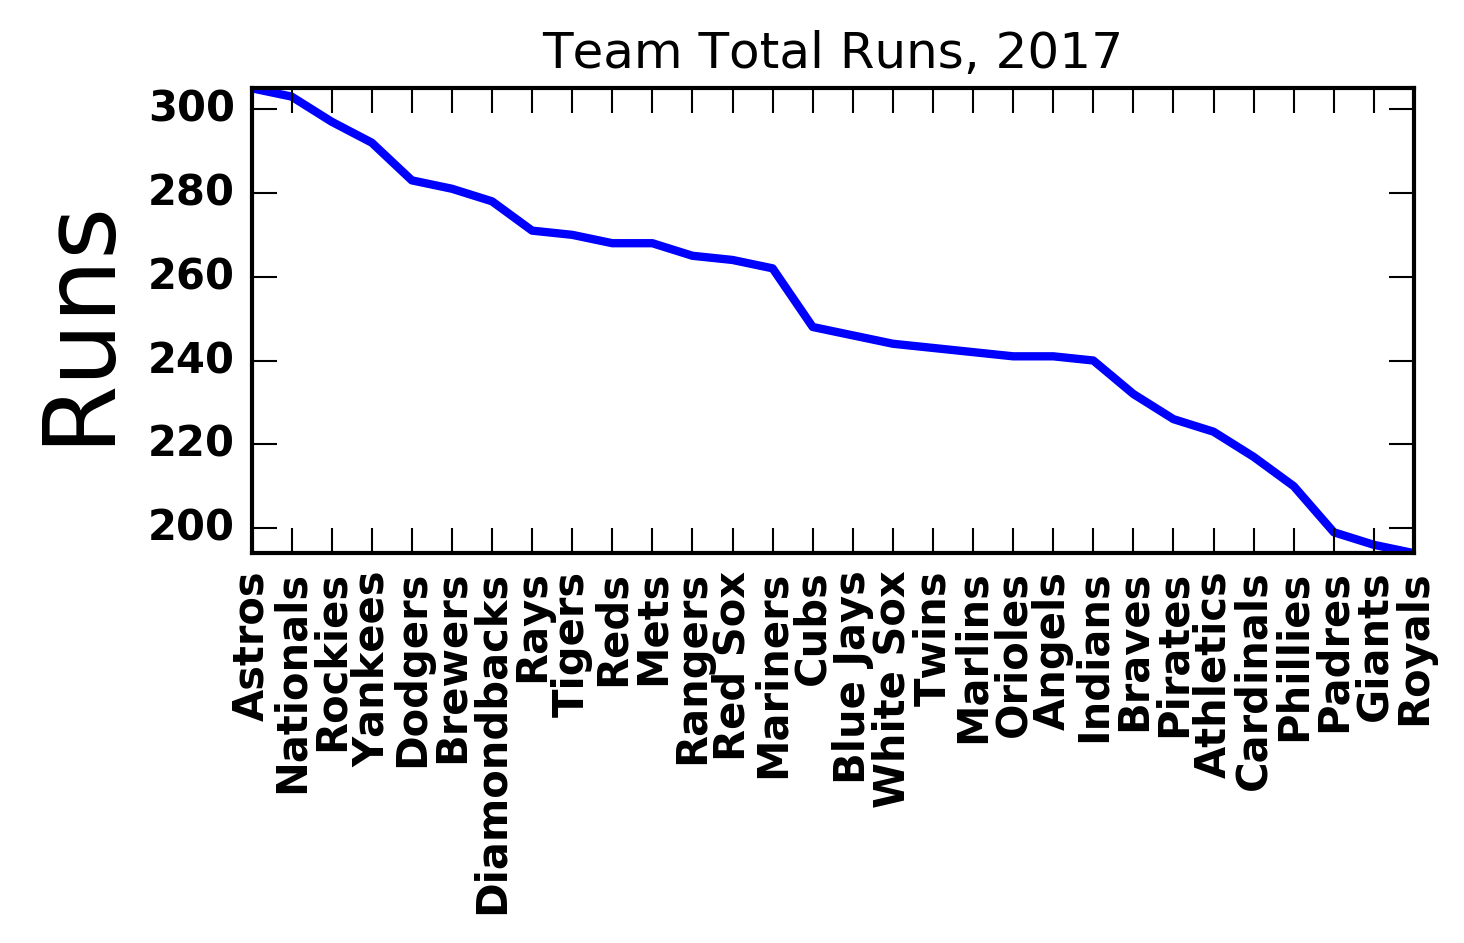

In [4]:
team_runs = Teams2017['R']
team_name = Teams2017['Team']

plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,team_runs.size,team_runs.size),team_runs[(-1.*team_runs).argsort()])
plt.ylabel('Runs',size=24)
plt.title('Team Total Runs, 2017')
_ = plt.axis([1.,30.,np.min(team_runs),np.max(team_runs)])

# You can specify a rotation for the tick labels in degrees or with keywords.
_ = plt.xticks(np.linspace(1,30,30), team_name[(-1.*team_runs).argsort()], rotation='vertical')

Anyone think that Coors inflates run totals?

The team rankings makes me think that we'll want to put some sort of caveat on looking at individual stats based on the team they are on. Let's start looking at individual players by setting up a ranking within the league.

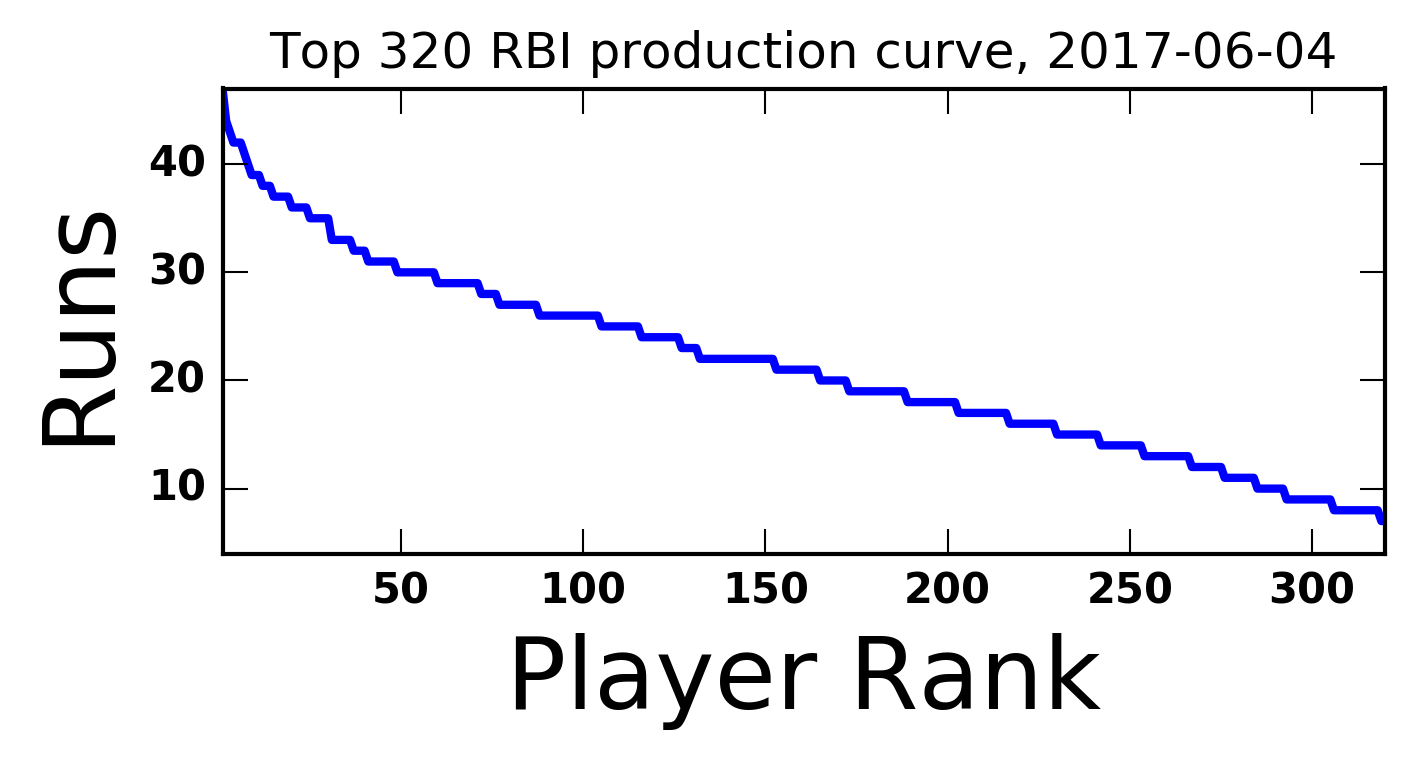

In [5]:
runs = Total2017['R']
pas = Total2017['PA']
names = Total2017['Name']

plt.figure(figsize=(5,2))
plt.plot(np.linspace(1.,runs.size,runs.size),runs[(-1.*runs).argsort()])
plt.xlabel('Player Rank',size=24)
plt.ylabel('Runs',size=24)
plt.title('Top 320 RBI production curve, 2017-06-04')
_ = plt.axis([1.,320.,np.min(runs),np.max(runs)])

#### What to notice? 

This curve already has the characteristic upturn at the high end!

